# Import Library

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Gambar

In [8]:
image_path = 'Soal1.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Konversi ke HSV

In [11]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Rentang Warna Dalam HSV

In [66]:
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)
result_blue = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_blue)

lower_green = np.array([40, 40, 40])
upper_green = np.array([80, 255, 255])
mask_green = cv2.inRange(hsv, lower_green, upper_green)
result_green = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_green)

lower_red1 = np.array([0, 120, 70])
upper_red1 = np.array([10, 255, 255])
mask_red1 = cv2.inRange(hsv, lower_red1, upper_red1)

lower_red2 = np.array([170, 120, 70])
upper_red2 = np.array([180, 255, 255])
mask_red2 = cv2.inRange(hsv, lower_red2, upper_red2)

mask_red = mask_red1 + mask_red2
result_red = cv2.bitwise_and(image_rgb, image_rgb, mask=mask_red)

# Tampilkan Hasil dan Histogram

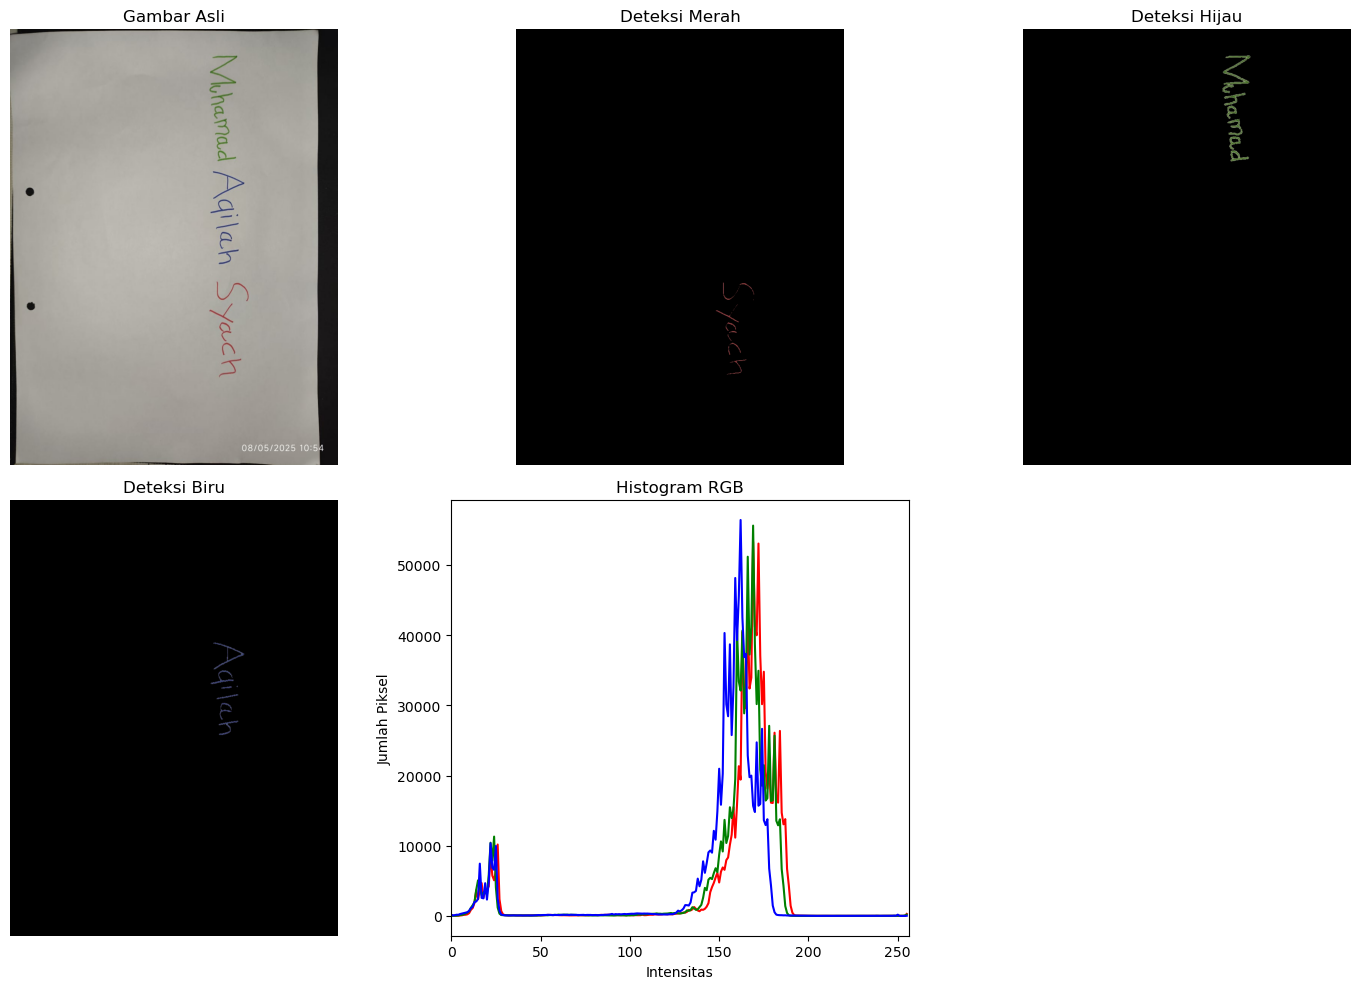

In [127]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title("Gambar Asli")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Deteksi Merah")
plt.imshow(result_red)
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Deteksi Hijau")
plt.imshow(result_green)
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title("Deteksi Biru")
plt.imshow(result_blue)
plt.axis('off')


colors = ('r', 'g', 'b')
plt.subplot(2, 3, 5)
for i, col in enumerate(colors):
    hist = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title("Histogram RGB")
plt.xlabel("Intensitas")
plt.ylabel("Jumlah Piksel")

plt.tight_layout()
plt.show()

# Treshhold

In [112]:
thresholds = {
    "RED1": {"lower": np.array([0, 70, 50]), "upper": np.array([10, 255, 255])},
    "RED2": {"lower": np.array([170, 70, 50]), "upper": np.array([180, 255, 255])},
    "GREEN": {"lower": np.array([40, 50, 50]), "upper": np.array([80, 255, 255])},
    "BLUE": {"lower": np.array([90, 50, 50]), "upper": np.array([130, 255, 255])}
}

# Masking

In [145]:
def apply_mask(img, mask):
    return cv2.bitwise_and(img, img, mask=mask)
    
mask_none = np.ones(image.shape[:2], dtype=np.uint8) * 255
mask_blue = cv2.inRange(hsv, thresholds["BLUE"]["lower"], thresholds["BLUE"]["upper"])
mask_green = cv2.inRange(hsv, thresholds["GREEN"]["lower"], thresholds["GREEN"]["upper"])
mask_red1 = cv2.inRange(hsv, thresholds["RED1"]["lower"], thresholds["RED1"]["upper"])
mask_red2 = cv2.inRange(hsv, thresholds["RED2"]["lower"], thresholds["RED2"]["upper"])
mask_red = cv2.bitwise_or(mask_red1, mask_red2)

mask_red_blue = cv2.bitwise_or(mask_red, mask_blue)
mask_rgb = cv2.bitwise_or(cv2.bitwise_or(mask_red, mask_green), mask_blue)
mask_rgb = cv2.bitwise_or(mask_red_blue, mask_green)

# Terapkan ke Hasil

In [147]:
images = {
    "NONE": apply_mask(image, mask_none),
    "BLUE": apply_mask(image, mask_blue),
    "RED-BLUE": apply_mask(image, mask_red_blue),
    "RED-GREEN-BLUE": apply_mask(image, mask_rgb)
}

titles = {
    "NONE": "NONE (Tanpa Masker)",
    "BLUE": "BLUE\nHSV: 90-130",
    "RED-BLUE": "RED: 0–180, BLUE: 90–130",
    "RED-GREEN-BLUE": "RED: 0–180, GREEN: 40–80, BLUE: 90–130"
}

# Tampilkan

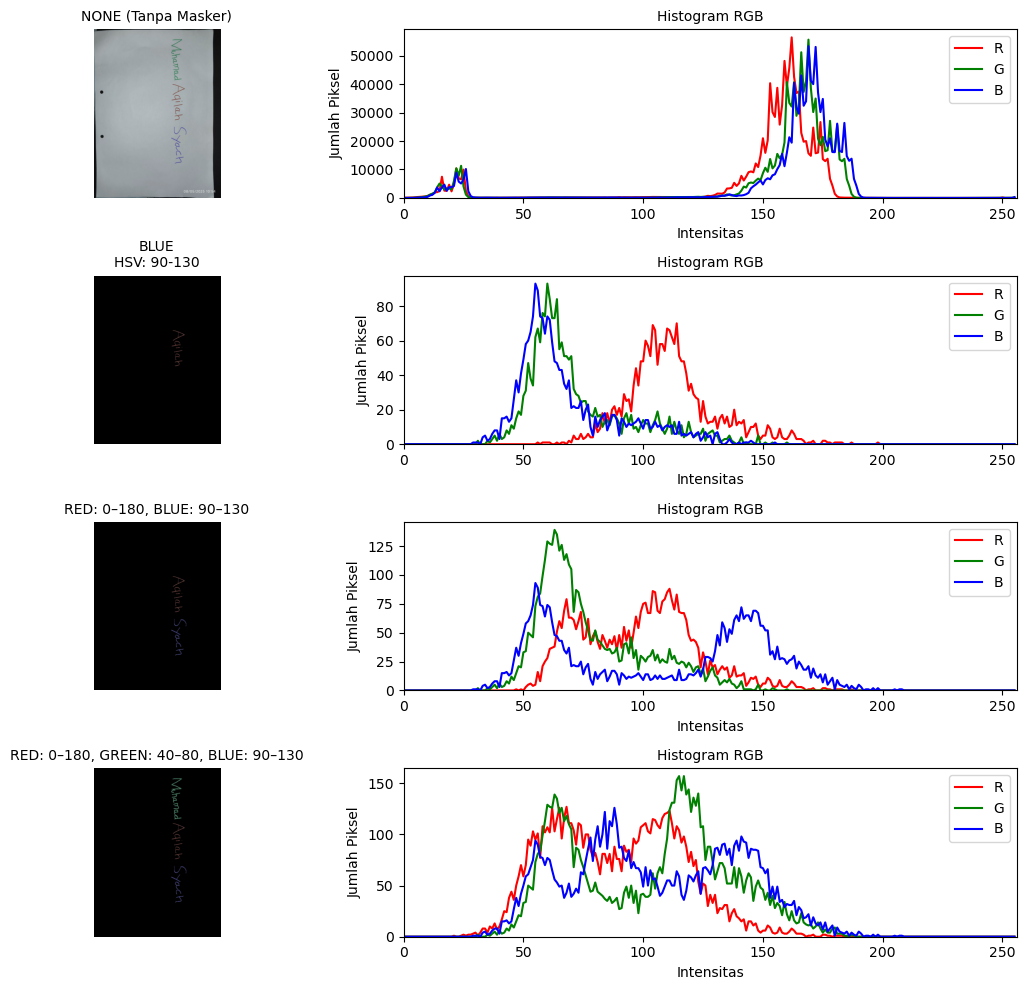

In [167]:
# --- Plotting gambar dan histogram ---
plt.figure(figsize=(12, 10))
for i, (label, img) in enumerate(images.items()):
    # Gambar
    plt.subplot(len(images), 2, 2*i+1)
    plt.imshow(img)
    plt.title(titles[label], fontsize=10)
    plt.axis("off")

    # Histogram RGB
    plt.subplot(len(images), 2, 2*i+2)
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    non_black_mask = img_gray > 0

    if np.any(non_black_mask):
        for j, color in enumerate(('r', 'g', 'b')):
            # Ambil hanya nilai channel yang bukan hitam
            channel_data = img[:, :, j][non_black_mask]
            hist = cv2.calcHist([channel_data], [0], None, [256], [0, 256])
            plt.plot(hist, color=color, label=color.upper())
        plt.legend()
    else:
        plt.text(125, 0.5, "Tidak ada piksel terdeteksi", ha='center', fontsize=8)

    plt.xlim([0, 256])
    plt.ylim(bottom=0)
    plt.xlabel("Intensitas")
    plt.ylabel("Jumlah Piksel")
    plt.title("Histogram RGB", fontsize=10)

plt.tight_layout()
plt.show()

# Backlight

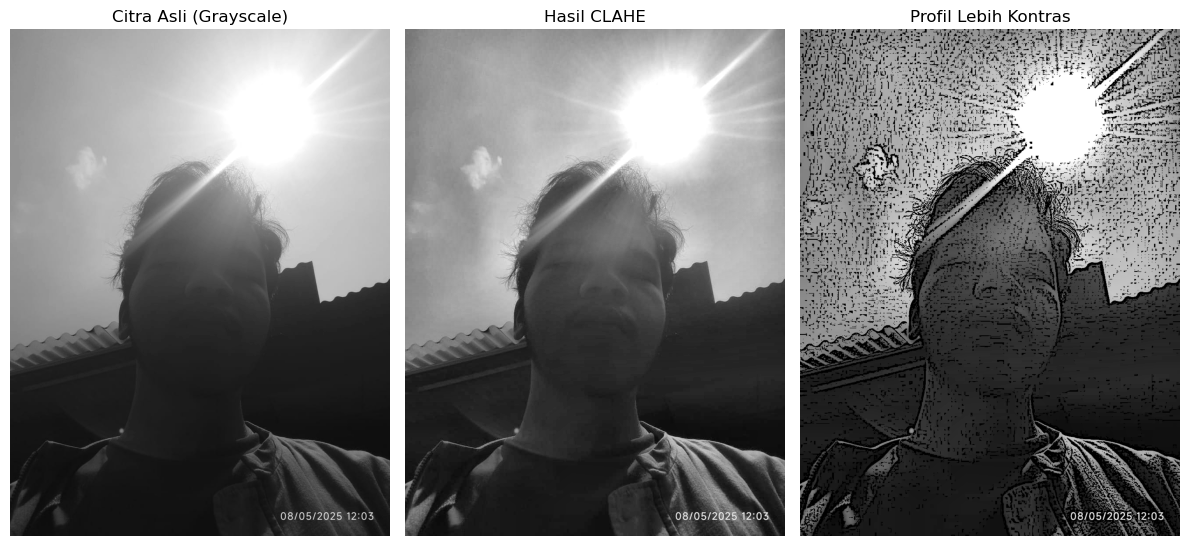

In [200]:
backlight = cv2.imread("Soal3.jpg")
gray = cv2.cvtColor(backlight, cv2.COLOR_BGR2GRAY)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced = clahe.apply(gray)

, mask = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

mask = cv2.adaptiveThreshold(enhanced, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                             cv2.THRESH_BINARY, 11, 2)

result = cv2.bitwise_and(enhanced, enhanced, mask=mask)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Citra Asli (Grayscale)")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Hasil CLAHE")
plt.imshow(enhanced, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Profil Lebih Kontras")
plt.imshow(result, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()